In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import PredefinedSplit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from scipy.sparse import vstack

from utils.pickle import load_pickles

In [8]:
(
    train_x,
    valid_x,
    test_x,
    train_y,
    valid_y,
    test_y
) = load_pickles()

#### Vectorize training data into features

In [9]:
word_vectorizer = TfidfVectorizer(lowercase=False,ngram_range=(1,3),max_features=20000)
word_vectorizer = word_vectorizer.fit(train_x)
train_features = word_vectorizer.transform(train_x)
validation_features = word_vectorizer.transform(valid_x)


### Fitting and predicting individual class labels
#### Train and calculate AUC using decision tree classifiers for all class labels and varying max depths

In [4]:
classes = 6
max_iters = [1, 5, 10, 20, 40, 80, 160, 320]
train_mean_aucs, val_mean_aucs = [], []

for max_iter in max_iters:
    val_aucs = []
    train_aucs = []
    for i in range(classes):
        classifier = LogisticRegression(max_iter=max_iter)
        classifier = classifier.fit(train_features, train_y[:, i])
        
        valid_y_hat = classifier.predict_proba(validation_features)[:, 1]
        fpr, tpr, thresholds = roc_curve(valid_y[:, i], valid_y_hat)
        val_aucs.append(auc(fpr, tpr))
        
        train_y_hat = classifier.predict_proba(train_features)[:, 1]
        fpr, tpr, thresholds = roc_curve(train_y[:, i], train_y_hat)
        train_aucs.append(auc(fpr, tpr))

    val_mean_aucs.append(np.mean(val_aucs))
    train_mean_aucs.append(np.mean(train_aucs))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


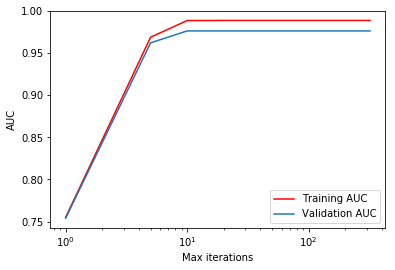

In [5]:
plt.semilogx(max_iters, train_mean_aucs, "r", label="Training AUC")
plt.semilogx(max_iters, val_mean_aucs, label="Validation AUC")
plt.xlabel("Max iterations")
plt.ylabel("AUC")
plt.legend()
plt.show()

We can see that at max iterations = 10, we have the highest AUC.

### Performing a grid search to find the optimal hyper parameters

In [8]:

penalty = ['l1', 'l2']
max_iter = [8, 10, 20, 40, 100]
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty, max_iter=max_iter)
model = LogisticRegression(solver='liblinear')

ps = PredefinedSplit(test_fold=[-1]*train_features.shape[0] + [0]*validation_features.shape[0])

val_aucs = []
train_aucs = []
best_params = []

X = vstack((train_features,validation_features))
Y = np.concatenate((train_y, valid_y))

for i in range(classes):
    classifier = GridSearchCV(model, hyperparameters, scoring='roc_auc', cv=ps, verbose=0)
    classifier = classifier.fit(X, Y[:, i])

    valid_y_hat = classifier.predict_proba(validation_features)[:, 1]
    fpr, tpr, thresholds = roc_curve(valid_y[:, i], valid_y_hat)
    val_aucs.append(auc(fpr, tpr))

    train_y_hat = classifier.predict_proba(train_features)[:, 1]
    fpr, tpr, thresholds = roc_curve(train_y[:, i], train_y_hat)
    train_aucs.append(auc(fpr, tpr))
    
    best_params.append(classifier.best_params_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
print(np.mean(val_aucs))
print(np.mean(train_aucs))

0.9851017737746729
0.9848457310938216


In [10]:
print(max(val_mean_aucs))
print(max(train_mean_aucs))

0.9761425389363296
0.9885570699973577


In [11]:
print(best_params)

[{'C': 2.7825594022071245, 'max_iter': 8, 'penalty': 'l2'}, {'C': 1.0, 'max_iter': 20, 'penalty': 'l1'}, {'C': 1.0, 'max_iter': 10, 'penalty': 'l1'}, {'C': 1.0, 'max_iter': 40, 'penalty': 'l1'}, {'C': 464.15888336127773, 'max_iter': 8, 'penalty': 'l2'}, {'C': 1.0, 'max_iter': 20, 'penalty': 'l2'}]


In [5]:
classes = 6
hyper_params = [{'C': 2.7825594022071245, 'max_iter': 8, 'penalty': 'l2'}, {'C': 1.0, 'max_iter': 20, 'penalty': 'l1'}, {'C': 1.0, 'max_iter': 10, 'penalty': 'l1'}, {'C': 1.0, 'max_iter': 40, 'penalty': 'l1'}, {'C': 464.15888336127773, 'max_iter': 8, 'penalty': 'l2'}, {'C': 1.0, 'max_iter': 20, 'penalty': 'l2'}]

val_aucs = []
train_aucs = []
for i in range(classes):
    classifier = LogisticRegression(**hyper_params[i])
    classifier = classifier.fit(train_features, train_y[:, i])

    valid_y_hat = classifier.predict_proba(validation_features)[:, 1]
    fpr, tpr, thresholds = roc_curve(valid_y[:, i], valid_y_hat)
    val_aucs.append(auc(fpr, tpr))

    train_y_hat = classifier.predict_proba(train_features)[:, 1]
    fpr, tpr, thresholds = roc_curve(train_y[:, i], train_y_hat)
    train_aucs.append(auc(fpr, tpr))

print("Final Validation AUC with optimized hyperparameters: {}".format(np.mean(val_aucs)))
print("Final Training AUC with optimized hyperparameters: {}".format(np.mean(train_aucs)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Final Validation AUC with optimized hyperparameters: 0.9765635169077354
Final Training AUC with optimized hyperparameters: 0.9849286403090919


In [6]:
classes = 6
hyper_params = [{'C': 2.7825594022071245, 'max_iter': 8, 'penalty': 'l2'}, {'C': 1.0, 'max_iter': 20, 'penalty': 'l1'}, {'C': 1.0, 'max_iter': 10, 'penalty': 'l1'}, {'C': 1.0, 'max_iter': 40, 'penalty': 'l1'}, {'C': 464.15888336127773, 'max_iter': 8, 'penalty': 'l2'}, {'C': 1.0, 'max_iter': 20, 'penalty': 'l2'}]

train_features = word_vectorizer.transform(train_x)
test_features = word_vectorizer.transform(test_x)
val_aucs = []
train_aucs = []
for i in range(classes):
    classifier = LogisticRegression(**hyper_params[i])
    classifier = classifier.fit(train_features, train_y[:, i])

    valid_y_hat = classifier.predict_proba(test_features)[:, 1]
    fpr, tpr, thresholds = roc_curve(test_y.values[:, i], valid_y_hat)
    val_aucs.append(auc(fpr, tpr))

    train_y_hat = classifier.predict_proba(train_features)[:, 1]
    fpr, tpr, thresholds = roc_curve(train_y[:, i], train_y_hat)
    train_aucs.append(auc(fpr, tpr))

print("Final Test AUC with optimized hyperparameters: {}".format(np.mean(val_aucs)))
print("Final Training AUC with optimized hyperparameters: {}".format(np.mean(train_aucs)))

Final Validation AUC with optimized hyperparameters: 0.971503552074562
Final Training AUC with optimized hyperparameters: 0.9849271451372069
